In [153]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from glob import glob

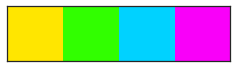

In [154]:
c = sns.color_palette(palette = 'hsv',n_colors=12, desat = 1)
colors = [c[1], c[3], c[6], c[10]]
sns.palplot(colors)

In [155]:
df1  = pd.read_csv('./5FCV_all_avg_0_no embedding.csv', index_col=0)
df2  = pd.read_csv('./5FCV_all_avg_1_PCA.csv', index_col=0)
df3  = pd.read_csv('./5FCV_all_avg_4_Tree.csv', index_col=0)
df4  = pd.read_csv('./5FCV_all_avg_5_Tree_FS.csv', index_col=0)

In [156]:
df1 = df1[df1.columns[:-1]].unstack().reset_index()
df1.columns = ['Supervised model', 'task', 'ROC-AUC']

df2 = df2[df2.columns[:-1]].unstack().reset_index()
df2.columns = ['Supervised model', 'task', 'ROC-AUC']

df3 = df3[df3.columns[:-1]].unstack().reset_index()
df3.columns = ['Supervised model', 'task', 'ROC-AUC']

df4 = df4[df4.columns[:-1]].unstack().reset_index()
df4.columns = ['Supervised model', 'task', 'ROC-AUC']

/home/shenwanxiang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator


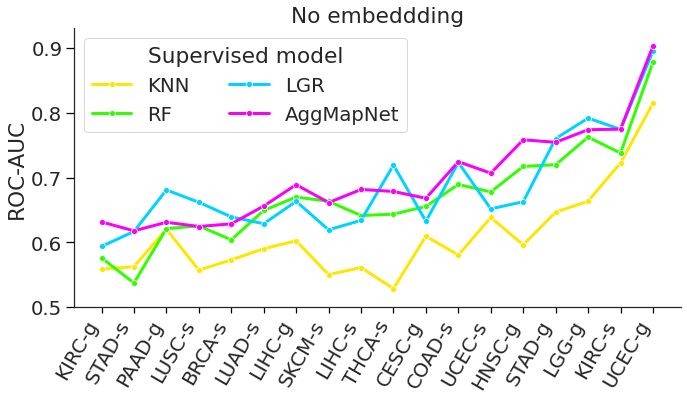

In [167]:
sidx = ['KIRC grade', 'STAD stage', 'PAAD grade', 'LUSC stage', 'BRCA stage', 
        'LUAD stage', 'LIHC grade', 'SKCM stage', 'LIHC stage', 'THCA stage', 
        'CESC grade', 'COAD stage', 'UCEC stage', 'HNSC grade', 'STAD grade', 
        'LGG grade', 'KIRC stage', 'UCEC grade']
def sort_data(data, sidx):

    ndata = []
    for model in data['Supervised model'].unique():
        d1 = data[data['Supervised model'] == model].set_index('task').loc[sidx]
        d1 = d1.reset_index()
        ndata.append(d1)
    return pd.concat(ndata)


def get_name(x):
    n, c = x.split(' ')
    return n+'-'+c[0]


data = sort_data(df1, sidx)
x = 'task'
y='ROC-AUC'
hue = 'Supervised model'
style='Supervised model'
hue_order = ['KNN', 'RF', 'LGR', 'AggMapNet']

sns.set(style='white',  font='sans-serif', font_scale=1.8)
fig, ax1  = plt.subplots( figsize=(10, 6), sharey=True, sharex=True)


l = sns.lineplot(x = 'task', y='ROC-AUC', hue = 'Supervised model',#style='Supervised model', 
                 palette  = colors, lw = 3, ls = 'dotted', hue_order = hue_order, 
                 marker='o',  data = data, sort=False,  ax=ax1)



ax1.set_xticklabels([get_name(i) for i in sidx], rotation=60, ha='right') #, ha='left'
ax1.tick_params(axis='x',which='major',direction='out', bottom=True,length=6, color='black')  

ax1.tick_params(axis='y',which='major', direction='out', left=True,length=8, color='black')   


ax1.legend(title="Supervised model" , labels= hue_order, ncol = 2)
#ax.xticks(rotation=45, ha='right')
ax1.set_ylabel('ROC-AUC')
ax1.set_xlabel('')

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.set_ylim(0.5, 0.93)
ax1.set_title('No embeddding')

fig.tight_layout()

fig.savefig('./df1.pdf', dpi = 400)

/home/shenwanxiang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator


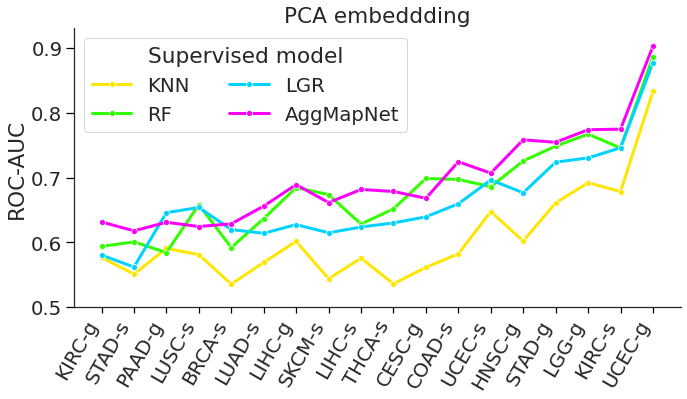

In [168]:
data = sort_data(df2, sidx)
x = 'task'
y='ROC-AUC'
hue = 'Supervised model'
style='Supervised model'
hue_order = ['KNN', 'RF', 'LGR', 'AggMapNet']

sns.set(style='white',  font='sans-serif', font_scale=1.8)
fig, ax1  = plt.subplots( figsize=(10, 6), sharey=True, sharex=True)


l = sns.lineplot(x = 'task', y='ROC-AUC', hue = 'Supervised model', #style='Supervised model', 
                 palette  = colors, lw = 3, ls = 'dotted', hue_order = hue_order, 
                 marker='o',  data = data, sort=False,  ax=ax1)



ax1.set_xticklabels([get_name(i) for i in sidx], rotation=60, ha='right') #, ha='left'
ax1.tick_params(axis='x',which='major',direction='out', bottom=True,length=6, color='black')  

ax1.tick_params(axis='y',which='major', direction='out', left=True,length=8, color='black')   


ax1.legend(title="Supervised model" , labels= hue_order, ncol = 2)
#ax.xticks(rotation=45, ha='right')
ax1.set_ylabel('ROC-AUC')
ax1.set_xlabel('')

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.set_ylim(0.5, 0.93)
ax1.set_title('PCA embeddding')

fig.tight_layout()

fig.savefig('./df2.pdf', dpi = 400)

/home/shenwanxiang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator


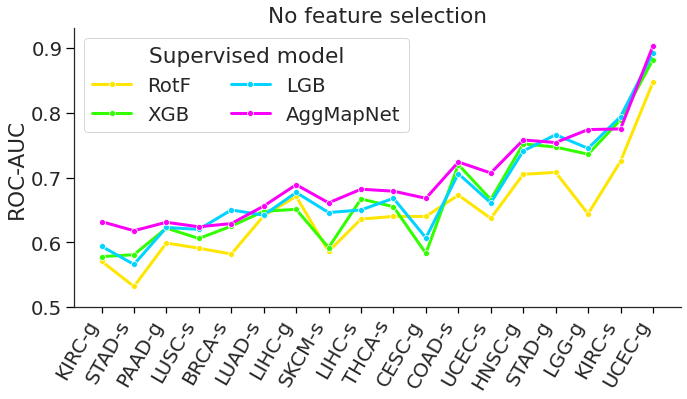

In [169]:
data = sort_data(df3, sidx)
x = 'task'
y='ROC-AUC'
hue = 'Supervised model'
style='Supervised model'
hue_order = ['RotF', 'XGB', 'LGB', 'AggMapNet']

sns.set(style='white',  font='sans-serif', font_scale=1.8)
fig, ax1  = plt.subplots( figsize=(10, 6), sharey=True, sharex=True)


l = sns.lineplot(x = 'task', y='ROC-AUC', hue = 'Supervised model', #style='Supervised model', 
                 palette  = colors, lw = 3,  ls = 'dotted', hue_order = hue_order, 
                 marker='o',  data = data, sort=False,  ax=ax1)



ax1.set_xticklabels([get_name(i) for i in sidx], rotation=60, ha='right') #, ha='left'
ax1.tick_params(axis='x',which='major',direction='out', bottom=True,length=6, color='black')  

ax1.tick_params(axis='y',which='major', direction='out', left=True,length=8, color='black')   


ax1.legend(title="Supervised model" , labels= hue_order, ncol = 2)
#ax.xticks(rotation=45, ha='right')
ax1.set_ylabel('ROC-AUC')
ax1.set_xlabel('')

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.set_ylim(0.5, 0.93)
ax1.set_title('No feature selection')

fig.tight_layout()

fig.savefig('./df3.pdf', dpi = 400)

/home/shenwanxiang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


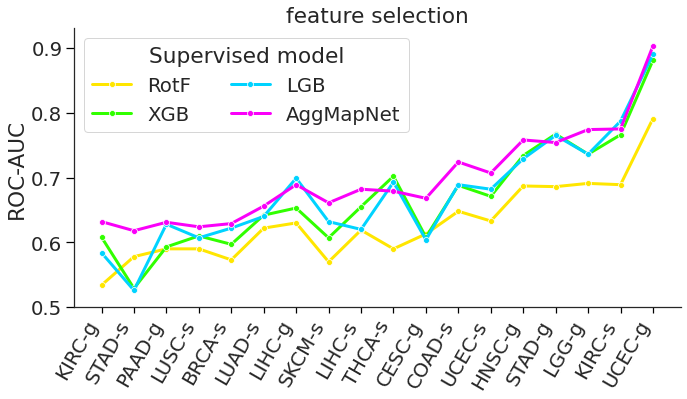

In [170]:
data = sort_data(df4, sidx)
x = 'task'
y='ROC-AUC'
hue = 'Supervised model'
style='Supervised model'
hue_order = ['RotF', 'XGB', 'LGB', 'AggMapNet']

sns.set(style='white',  font='sans-serif', font_scale=1.8)
fig, ax1  = plt.subplots( figsize=(10, 6), sharey=True, sharex=True)



l = sns.lineplot(x = 'task', y='ROC-AUC', hue = 'Supervised model', #style='Supervised model', 
                 palette  = colors, lw = 3,  ls = 'dotted', hue_order = hue_order, 
                 marker='o',  data = data, sort=False,  ax=ax1)



ax1.set_xticklabels([get_name(i) for i in sidx], rotation=60, ha='right') #, ha='left'
ax1.tick_params(axis='x',which='major',direction='out', bottom=True,length=6, color='black')  

ax1.tick_params(axis='y',which='major', direction='out', left=True,length=8, color='black')   


ax1.legend(title="Supervised model" , labels= hue_order, ncol = 2)
#ax.xticks(rotation=45, ha='right')
ax1.set_ylabel('ROC-AUC')
ax1.set_xlabel('')

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.set_ylim(0.5, 0.93)
ax1.set_title('feature selection')

fig.tight_layout()

fig.savefig('./df4.pdf', dpi = 400)